In [5]:
# State Tax Collections http://www2.census.gov/govs/statetax/14staxcd.txt
# Geo Data http://download.geonames.org/export/dump/
# Subsidized Households 2008 http://www.HUDuser.org/portal/picture2008/2008_tract.zip
# Zip Codes https://www.aggdata.com/node/86
# Unemployment Rates http://www.bls.gov/lau/laucntycur14.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
sal = pd.read_csv('salaries.csv')

In [7]:
sal.head(5)

,Function,sup1,sup2,sup3,sup4,sup5,salary,gender,disabled,race,...,inst4,inst5,instBudget,City,State,Zip,country,Category,instSize,instType
0,position1,16,1,0,350,135,125000.0,Woman,False,Caucasian,...,350,120,3100000.0,Edmonton,AB,T6G 2H9,CANADA,one,35630.0,Public Institution
1,position3,7,0,0,320,120,92000.0,Woman,False,Other,...,350,120,3100000.0,Edmonton,AB,T6G 2H9,CANADA,one,35630.0,Public Institution
2,position3,4,0,0,25,15,88000.0,Woman,False,Caucasian,...,350,120,3100000.0,Edmonton,AB,T6G 2H9,CANADA,one,35630.0,Public Institution
3,position5,0,0,0,5,0,75000.0,Woman,False,Caucasian,...,350,120,3100000.0,Edmonton,AB,T6G 2H9,CANADA,one,35630.0,Public Institution
4,position18,0,0,0,0,0,67000.0,Woman,False,Caucasian,...,350,120,3100000.0,Edmonton,AB,T6G 2H9,CANADA,one,35630.0,Public Institution


In [8]:
sal.mean()

sup1                 1.425292e+00
sup2                 7.375487e-01
sup3                 6.006929e-01
sup4                 4.977653e+01
sup5                 4.090515e+00
salary               4.923469e+04
disabled             1.299264e-02
yearsInPosition      5.690508e+00
yearsInProfession    9.331236e+00
age                  3.825722e+01
cred1                6.712863e-02
cred2                3.161542e-02
inst1                1.657557e+01
inst2                6.470333e+00
inst3                3.541793e+00
inst4                3.344331e+02
inst5                4.103854e+01
instBudget           4.751711e+06
instSize             2.506621e+04
dtype: float64

In [9]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]

In [10]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
         'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
X_categorical = sal2[X_categorical_features]

In [24]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

Function_dummies = pd.get_dummies(X_categorical['Function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
# print(gender_dummies)
race_dummies = pd.get_dummies(X_categorical['race'])
highestDegree_dummies = pd.get_dummies(X_categorical['highestDegree'])
Category_dummies = pd.get_dummies(X_categorical['Category'])
instType_dummies = pd.get_dummies(X_categorical['instType'])

X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

In [12]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [13]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [14]:
# y is salary
y = sal2.iloc[:, 6].values

In [15]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [16]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [17]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 24679.7195096
Coefficients: 
 [  7.04704753e+03  -4.89849022e+03  -6.15011258e+03  -5.76475010e+03
  -3.15999125e+03   4.85176883e+03  -6.56116978e+03  -5.92907309e+03
  -4.44512339e+03  -1.24785486e+02  -2.47448813e+03  -3.14042551e+03
  -7.51586873e+03  -7.18537600e+03  -5.50007990e+03  -9.68622360e+02
  -5.97170349e+03  -1.25333607e+04  -1.78642150e+03  -4.43590255e+03
  -4.31442558e+03   1.38041103e+03  -5.40497688e+03  -1.39662437e+03
  -5.73739071e+03  -3.83429612e+03  -2.56743303e+03  -7.09593415e+03
   1.42123126e+03   1.65266910e+02   2.17224951e+03   8.06448080e+03
   7.25990301e+03   4.80258179e+03   1.62709106e+03   6.57256825e+03
   3.16786819e+03   7.41347900e+02   5.09314855e+03   1.38008012e+04
   7.54412417e+03  -6.15583906e+02   5.07276292e+03  -5.07276292e+03
  -5.60522580e+03  -6.30844620e+03   1.86015844e+03   6.54297733e+02
  -5.74364076e+01   1.12927166e+00  -1.34795738e+00   2.05537435e+02
   1.39682102e+02   3.71887603e+02   1.49764706e+02   2.0981

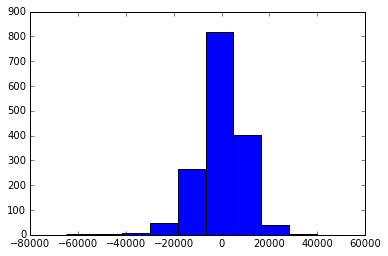

Distribution of prediction error on test data:


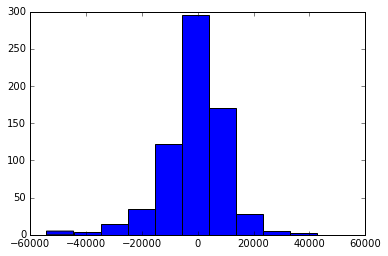

In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [20]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 1.09694177951e+18
Coefficients: 
 [ -1.25399569e+18  -2.05517284e+17  -2.42283163e+17 ...,  -2.06675930e-11
  -5.89324393e-08   1.42612344e-06]
Residual sum of squares, training data: 24328768.01
Residual sum of squares, test data: 19415629627015558337248451314581504.00
Variance score, training data: 0.93
Distribution of prediction error on training data:


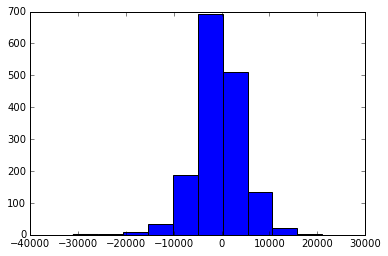

Distribution of prediction error on test data:


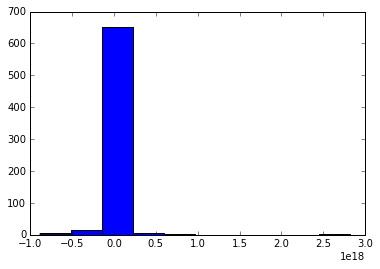

In [21]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 24096.7283525
Coefficients: 
 [  9.52951158e+03  -2.21366260e+03  -3.42145437e+03  -2.92193110e+03
  -4.69055025e+02   7.23635271e+03  -3.90886484e+03  -2.98338808e+03
  -1.70033004e+03   2.21233208e+03   1.87156551e+02  -5.32568540e+02
  -4.75308283e+03  -4.31612642e+03  -2.78979841e+03   1.26444679e+03
  -2.99335102e+03  -9.90620961e+03   6.32940117e+02  -1.65604697e+03
  -1.02165318e+03   3.95887890e+03  -2.70911788e+03   1.28426798e+03
  -3.03279101e+03  -1.14541278e+03   9.80661056e+01  -4.40290800e+03
   3.66364478e+03   2.41827951e+03  -1.93106413e+02   5.53238353e+03
   4.57912228e+03   2.49708815e+03  -6.64814654e+02   3.32089951e+03
   9.04064945e+02  -7.10445489e+02   3.55961374e+03   1.18488348e+04
   5.98763971e+03  -1.99177307e+03   4.83163200e+03  -4.83163200e+03
  -5.68908214e+03  -6.53617867e+03   1.87723945e+03   6.49733597e+02
  -5.04328147e+01   8.30717056e-01  -2.05371849e+00   1.38536827e+02
   1.34754356e+02   3.80079593e+02   1.47483379e+02   2.1782

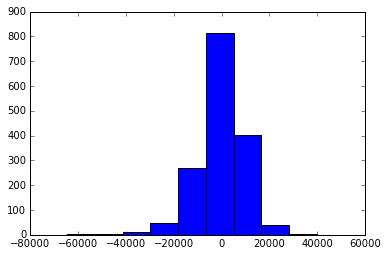

Distribution of prediction error on test data:


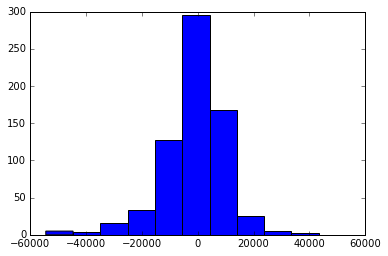

In [22]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

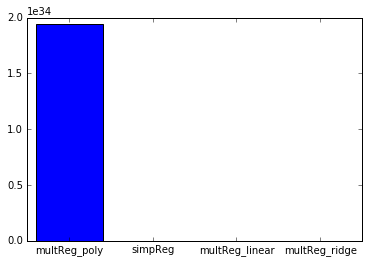

In [23]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()